In [111]:
#nbi:hide_in
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel, RBF

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm
import numpy
import nbinteract as nbi
import seaborn as sns
import scipy

# Gaussian Distribution

Gaussian Distributions are a powerful tool for statistical and Machine Learning tasks. They are used in fitting regression models, clustering and much more.
A gaussian distribution in a random variable X with mean μ and variance σ is a continuous statistic distribution on domain x∊(-∞,+∞) with probability density function given by the below equation. It is a bell curved shape probability distribution.

##### $$p(x \mid \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma}} \exp\left\{ -\frac{(x-\mu)^2}{\sigma^2}\right\}$$

### Visualisation of Gaussian Distribution

The following widget visualises Gaussian Distribution in Single Variable

In [2]:
#nbi:hide_in
def single_g(Mu, Sigma):
    
    x = numpy.linspace(-2.5, 12.5, 100)
    rv = multivariate_normal(Mu, Sigma)
    Z = rv.pdf(x)
    
    fig = plt.figure(figsize=(12,12))
    
    ax1 = fig.add_subplot(111)
    ax1.plot(x, Z)
    fig.show()
    ax1.set_title("Normal Distribution")
    ax1.set_xticks([])
    ax1.set_yticks([])
single_g = interact(single_g, Mu=(0,10), Sigma=(0.1,15,0.1));

interactive(children=(IntSlider(value=5, description='Mu', max=10), FloatSlider(value=7.5, description='Sigma'…

Many things closely follow a Normal Distribution:
1. Heights of people
2. Error in Measurement
### & Marks on a test!

## Fitting a single Gaussian

Let us generate some data

In [3]:
#nbi:hide_in
def pdf_func_1(x_array, amp, mean, sigma):
    return amp*(1/(sigma*(numpy.sqrt(2*numpy.pi))))*(numpy.exp(-((x_array-mean)**2)/((2*sigma)**2)))


In [4]:
#nbi:hide_in
def generate_marks(Mean=75,Sigma=15, Noise=5):
    # linearly spaced x-axis of 10 values between 1 and 10
    x_array = numpy.linspace(1,100,50)

    amp1 = 2000
    y_array_gauss = pdf_func_1(x_array, amp1, Mean, Sigma)
    # creating some noise to add the the y-axis data
    y_noise_gauss = numpy.random.normal(0,Noise,50)
    y_array_gauss += y_noise_gauss
    fig = plt.figure(figsize=(12,12))
    ax1 = fig.add_subplot(111)
    ax1.set_ylim(0,150)
    ax1.set_title("Marks in ML")
    ax1.scatter(x_array, y_array_gauss)
    
y_ = interact(generate_marks, Mean=(50,90), Sigma=(1,25,1), Noise=(1,10));

interactive(children=(IntSlider(value=75, description='Mean', max=90, min=50), IntSlider(value=15, description…

In [5]:
#nbi:hide_in

def fit_marks_1(Mean=75,Sigma=15, Noise=5):
# linearly spaced x-axis of 10 values between 1 and 10
    x_array = numpy.linspace(1,100,50)

    amp1 = 2000
    y_array_gauss = pdf_func_1(x_array, amp1, Mean, Sigma)
    # creating some noise to add the the y-axis data
    y_noise_gauss = numpy.random.normal(0,Noise,50)
    y_array_gauss += y_noise_gauss
    fig = plt.figure(figsize=(12,12))
    ax1 = fig.add_subplot(111)
    ax1.set_ylim(0,150)
    ax1.set_title("Marks in ML")
    ax1.scatter(x_array, y_array_gauss)

    popt_gauss, pcov_gauss = scipy.optimize.curve_fit(pdf_func_1, x_array, y_array_gauss, p0=[amp1, Mean, Sigma])
    gen_norm = pdf_func_1(x_array, popt_gauss[0], popt_gauss[1],popt_gauss[2])
    ax1.plot(x_array,gen_norm)
    

gen_marks = interact(fit_marks_1, Mean=(50,90), Sigma=(1,25,1), Noise=(1,10));

interactive(children=(IntSlider(value=75, description='Mean', max=90, min=50), IntSlider(value=15, description…

## Fitting a two Gaussian Variables

In [6]:
#nbi:hide_in
def pdf_func_2(x_array, amp1, mean1, sigma1, amp2, mean2, sigma2):
    return amp1*(1/(sigma1*(numpy.sqrt(2*numpy.pi))))*(numpy.exp(-((x_array-mean1)**2)/((2*sigma1)**2))) + amp2*(1/(sigma2*(numpy.sqrt(2*numpy.pi))))*(numpy.exp(-((x_array-mean2)**2)/((2*sigma2)**2)))

In [7]:
#nbi:hide_in
def fit_marks_1(Mean1=75,Sigma1=15,Mean2=75,Sigma2=15,Noise=5):
# linearly spaced x-axis of 10 values between 1 and 10
    x_array = numpy.linspace(1,100,50)

    amp1 = 1000
    amp2 = 1000
    y_array_gauss = pdf_func_2(x_array, amp1, Mean1, Sigma1, amp2, Mean2, Sigma2)
    # creating some noise to add the the y-axis data
    y_noise_gauss = numpy.random.normal(0,Noise,50)
    y_array_gauss += y_noise_gauss
    fig = plt.figure(figsize=(12,12))
    ax1 = fig.add_subplot(111)
    ax1.set_ylim(0,150)
    ax1.set_title("Marks in ML + Marks in DataScience")

    popt_gauss, pcov_gauss = scipy.optimize.curve_fit(pdf_func_2, x_array, y_array_gauss, p0=[amp1, Mean1, Sigma1,amp2, Mean2, Sigma2])
#     pars_1 = popt_2gauss[0:3]
#     pars_2 = popt_2gauss[3:6]
#     gauss_peak_1 = _1gaussian(x_array, *pars_1)
#     gauss_peak_2 = _1gaussian(x_array, *pars_2)
    gen_norm1 = pdf_func_1(x_array, popt_gauss[0], popt_gauss[1],popt_gauss[2])
    gen_norm2 = pdf_func_1(x_array, popt_gauss[3], popt_gauss[4],popt_gauss[5])
    ax1.plot(x_array, gen_norm1)
    ax1.plot(x_array,gen_norm2)
    ax1.scatter(x_array, y_array_gauss)
    
gen_marks_2 = interact(fit_marks_1, Mean1=(50,90), Sigma1=(1,10,1),Mean2=(40,70), Sigma2=(1,10,1), Noise=(1,10));

interactive(children=(IntSlider(value=75, description='Mean1', max=90, min=50), IntSlider(value=10, descriptio…

# Importance of Gaussian Distribution

### Central Limit Theorem

$$\begin{align}  Z_{\large n}=\frac{\overline{X}-\mu}{\sigma / \sqrt{n}}=\frac{X_1+X_2+...+X_{\large n}-n\mu}{\sqrt{n} \sigma}
\end{align}$$

Let X1,X2,...,Xn be i.i.d. random variables with expected value μ<∞ and standard deviation σ. The above expression tends to be standard Normal or <b>Gaussian Distribution</b>

$$\begin{align}\lim_{n \rightarrow \infty} P(Z_{\large n} \leq x)=\Phi(x), \qquad \textrm{ for all }x \in \mathbb{R},
\end{align}$$

This property makes Gaussians very useful tool for analysis

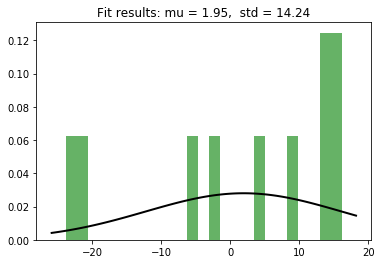

In [131]:
#nbi:hide_in
def lawlargeNumbers(mean,sigma,samples):
    # Generate some data for this demonstration.
    data = norm.rvs(mean, sigma, size=samples)

    # Fit a normal distribution to the data:
    mu, std = norm.fit(data)

    # Plot the histogram.
    plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = numpy.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)

    plt.show()

lawlargeNumbers(5,10,10)

## Multivariate Gaussian Variables

The probability distribution function for multivariate gaussian distribution in given by the bellow expression. Here μ is a vector of means of normal distribution in every dimension and Σ is the covariance matrix

$$p(x \mid \mu, \Sigma) = (2\pi)^{-k/2}|\Sigma|^{-1/2} \exp\left\{ -\frac{1}{2} (x-\mu)^{\prime}\Sigma^{-1}(x-\mu) \right\}$$

### Visualisation of Gaussian Distribution in 2 variables

In [9]:
#nbi:hide_in
def f(Mean1,Mean2,Cov11=1,Cov12=0,Cov21=0,Cov22=1):
    
    try: 
        Cov11=float(Cov11)
        Cov12=float(Cov12)
        Cov21=float(Cov21)
        Cov22=float(Cov22)
    except:
        print("Invalid Covariance Values")
        return
    
    x = numpy.linspace(0, 10, 100)
    y = numpy.linspace(0, 10, 100)
    X, Y = numpy.meshgrid(x, y)
    pos = numpy.dstack((X, Y))
    mu = numpy.array([Mean1,Mean2])
    try:
        cov = numpy.array([[Cov11, Cov12],[Cov21, Cov22]])
        rv = multivariate_normal(mu, cov)
        Z = rv.pdf(pos)
    except:
        print("Invalid Covariance Matrix: Not a positive semi-definite Matrix\nPlease try other values")
        return
    
    fig = plt.figure(figsize=(15,8))
    
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(X, Y, Z, cmap='RdPu')
    ax2 = fig.add_subplot(122)
    ax2.contourf(X,Y,Z,levels=25,cmap='RdPu')
    
    ax1.set_title("Probability Distribution Function")
    ax2.set_title("Contour Plot")
    
    ax2.set_axis_off()
    ax1.set_axis_off()
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_zticks([])

t = interact(f, Mean1=(0,10),Mean2=(0,10), Cov11='5',Cov12='0',Cov21='0',Cov22='5');

interactive(children=(IntSlider(value=5, description='Mean1', max=10), IntSlider(value=5, description='Mean2',…

## Gaussian Process Fitting

We saw that Gaussian Distributions can be used to model data in above examples.<br> But the Data is not always so straightforward. And Normal distributions are not flexible enough distributions to fit complex data.

In such cases, using a set of Gaussian distributions to model data has a number of advantages. 
1. The Marginal Distribution of any subset of elements from a Multivariate Normal Distribution is also normal<br>
$$p(x,y) = \mathcal{N}\left(\left[{ 
\begin{array}{c} 
{\mu_x} \\ 
{\mu_y} \\ 
\end{array} 
}\right], \left[{ 
\begin{array}{cc} 
{\Sigma_x} & {\Sigma_{xy}} \\\\ 
{\Sigma_{xy}^T} & {\Sigma_y} 
\end{array} 
}\right]\right)$$<br>
$$p(x) = \int p(x,y) dy = \mathcal{N}(\mu_x, \Sigma_x)$$
2. The Conditional Distributions of a subset of the elements of a Multivariate Normal Distribution (conditional on the remaining elements) are normal too:
$$p(x|y) = \mathcal{N}(\mu_x + \Sigma_{xy}\Sigma_y^{-1}(y-\mu_y), 
\Sigma_x-\Sigma{xy}\Sigma_y^{-1}\Sigma{xy}^T)$$

### Let us formally Define Gaussian Process

Gaussian Process is an infinite collection of Random Variables with any marginal subset having Gaussian distribution. Another way of thinking about an infinite collection or vector of random variables is a function.<br>
So a Gaussian process can be described as an distribution over functions and is fully specified by a <b>Mean</b> function and <b>Covariance</b> function
$$p(x) \sim \mathcal{GP}(m(x), k(x,x^{\prime}))$$

To make things easier we assume the mean function to be <b>zero</b>.
Covariance function is also known as kernel. Scikit-Learn and GPflow distributions offer various kernels. Some of these are:

1. Radial Basis Function
2. Matern covariance function
3. Linear Function

In [135]:
# nbi:hide_in
# ### Let us study one simple covariance function

# Define Exponential covariance function as follows:

# $$\begin{aligned}
# m(x) &=0 \\
# k(x,x^{\prime}) &= \theta_1\exp\left(-\frac{\theta_2}{2}(x-x^{\prime})^2\right)
# \end{aligned}$$

In [132]:
#nbi:hide_in
def exponential_cov(x, y, params):
    return params[0] * np.exp( -0.5 * params[1] * np.subtract.outer(x, y)**2)

def conditional(x_new, x, y, params):
    B = exponential_cov(x_new, x, params)
    C = exponential_cov(x, x, params)
    A = exponential_cov(x_new, x_new, params)
    mu = np.linalg.inv(C).dot(B.T).T.dot(y)
    sigma = A - B.dot(np.linalg.inv(C).dot(B.T))
    return(mu.squeeze(), sigma.squeeze())

def predict(x, data, kernel, params, sigma, t):
    k = [kernel(x, y, params) for y in data]
    Sinv = np.linalg.inv(sigma)
    y_pred = np.dot(k, Sinv).dot(t)
    sigma_new = kernel(x, x, params) - np.dot(k, Sinv).dot(k)
    return y_pred, sigma_new

For regression tasks, GaussianProcessRegressor can be used from scikit-learn by specifying appropriate covariance function or kernel. The GaussianProcessRegressor does not allow for the specification of mean function and always assumes it to be zero.

Fitting starts by maximizing the marginal likelihood. This is a convinent approach for Gaussian Process as it avoids the computationally expensive cross validation step that is generally used for selecting optimal hyperparameters.

A kernel can be defined as the sum of a covariance function, an amplitude factor(ConstantKernel) and an observational noise(WhiteKernel)

In [133]:
#nbi:hide_in
kernel = WhiteKernel(noise_level=1)+ ConstantKernel() + RBF() #+ Matern(length_scale=2, nu=3/2) 

x = numpy.linspace(-5,5,101)
def gp_fit(Noise, Parameter1, Parameter2):
    y = 5+ 5*(numpy.sin(x) + numpy.sin(Parameter1*x+numpy.pi/(Parameter2*2)) - numpy.sin((Parameter1-1)*x+numpy.pi/(Parameter2*4))) + numpy.random.normal(0,Noise,x.shape)

    X = x.reshape(-1, 1)
    X.shape

    gp = gaussian_process.GaussianProcessRegressor(kernel=kernel)
    gp.fit(X, y)

    x_pred = numpy.linspace(-6, 6).reshape(-1,1)
    y_pred, sigma = gp.predict(x_pred, return_std=True)

    plt.figure(figsize=(10,8))
    sns.regplot(x, y, fit_reg=False, label='Data')
    plt.plot(x_pred, y_pred, color='grey', label='Prediction')
    plt.fill(numpy.concatenate([x_pred, x_pred[::-1]]),
             numpy.concatenate([y_pred - 2*sigma,
                            (y_pred + 2*sigma)[::-1]]),
             alpha=.5, fc='grey', ec='None', label='95% CI')
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.xlim(-6, 6)
    plt.legend(loc='lower left');
    
t = interact(gp_fit, Noise=(0,2,0.5),Parameter1=(0.5,2.5,0.1),Parameter2=(2,8));

interactive(children=(FloatSlider(value=1.0, description='Noise', max=2.0, step=0.5), FloatSlider(value=1.5, d…

Github link: https://github.com/smeet20/ML-Demo